In [1]:
import numpy as np
import tensorflow as tf

/home/jackalhan/Development/github/more_meaningful_representations/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100, (5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op = a + b
mul_op = a * b

In [8]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:10, b:20})
    print(add_result)
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mul_result)

30.0
[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


### NN

In [9]:
n_features = 10
n_dense_neurons = 3

In [10]:
x = tf.placeholder(tf.float32, (None,n_features))

In [11]:
# 1 layer with 3 dense neurons
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
# x * b therefore b with x (n_features, n_dense_neurons) will give us results for all features
b = tf.Variable(tf.ones([n_dense_neurons]))

In [12]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)

In [13]:
# Activation function
a = tf.sigmoid(z)

In [14]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([5,n_features])})

In [15]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]
 [0.31433168 0.48861519 0.23742266]
 [0.5571275  0.8654362  0.693713  ]
 [0.36952776 0.8391483  0.37507942]
 [0.3589291  0.7181983  0.37505957]]


### Simple Regression Example

In [16]:
x_data = np.linspace(0,10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([ 0.85356555,  1.67283722,  2.80745771,  3.32393289,  5.87052783,
        4.66613842,  6.0637279 ,  6.96074546,  7.53339555, 11.21191407])

In [17]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([-1.25968938,  1.43275993,  2.61476233,  2.96715913,  2.98416748,
        6.58221379,  6.3214799 ,  7.93277531,  9.52050331, 10.52583655])

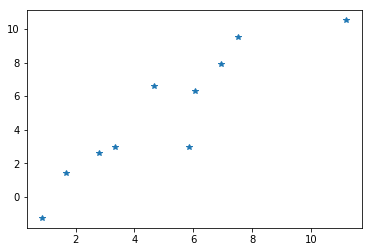

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data, y_label, '*')

y = mx + b

In [19]:
rands = np.random.rand(2)

In [20]:
m = tf.Variable(rands[0])
b = tf.Variable(rands[1])

In [21]:
#cost function
error = 0

for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2 # punish higher errors 

In [23]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [24]:
init = tf.global_variables_initializer()

### Saving the model

In [25]:
saver = tf.train.Saver()

In [26]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    
    #fetch back results
    final_slope, final_intercept = sess.run([m, b])
    
    # after we have done with everything, it is time to save the model
    saver.save(sess, 'models/my_first_saved_model.ckpt')

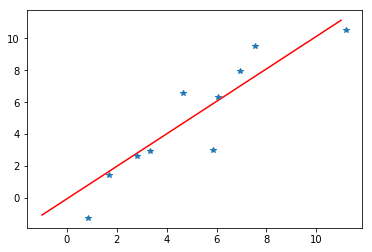

In [27]:
x_test = np.linspace(-1, 11, 10)
#y = mx + b
y_hat_plot = final_slope * x_test + final_intercept
plt.plot(x_test, y_hat_plot, 'r')
plt.plot(x_data, y_label, '*')

### Loading a Model

In [28]:
with tf.Session() as sess:
    saver.restore(sess, 'models/my_first_saved_model.ckpt')
    #fetch back results
    final_slope, final_intercept = sess.run([m, b])

INFO:tensorflow:Restoring parameters from models/my_first_saved_model.ckpt


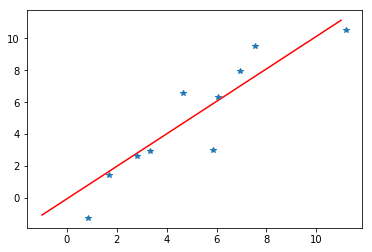

In [29]:
x_test = np.linspace(-1, 11, 10)
#y = mx + b
y_hat_plot = final_slope * x_test + final_intercept
plt.plot(x_test, y_hat_plot, 'r')
plt.plot(x_data, y_label, '*')